In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import math

In [3]:
import pandas as pd
import numpy as np
import random as rand

In [4]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [5]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [6]:
test_df=test_df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked'], axis=1)
train_df=train_df.drop(['Name','Ticket','PassengerId', 'Cabin','Embarked'], axis=1)

In [7]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


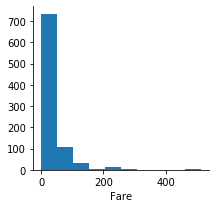

In [8]:
grid=sns.FacetGrid(train_df)
grid.map(plt.hist, 'Fare')
grid.add_legend()

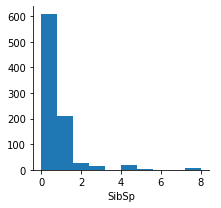

In [9]:
grid=sns.FacetGrid(train_df)
grid.map(plt.hist, 'SibSp')
grid.add_legend()

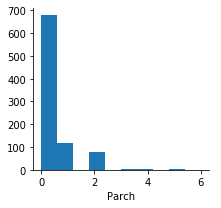

In [10]:
grid=sns.FacetGrid(train_df)
grid.map(plt.hist, 'Parch')
grid.add_legend()

In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#train_df[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
train_df['Fare']=train_df['Fare'].fillna(train_df['Fare'].mean())
test_df['Age']=test_df['Age'].fillna(train_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(train_df['Fare'].mean())

In [13]:
train_df.shape, test_df.shape

((891, 7), (418, 6))

In [14]:
combine=[train_df, test_df]

In [15]:
for dataset in combine:
    dataset['Age']=dataset['Age'].map(lambda x: x/10*10)
    dataset['Fare']=dataset['Age'].map(lambda x: int(x)/10*10)
    dataset['Sex']=dataset['Sex'].map({'male':0, 'female':1}).astype(int)
    #dataset['Cabin']=dataset['Cabin'].fillna('None')
    #dataset['Cabin']=dataset['Cabin'].map(lambda x: x[0])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,22.0
1,1,1,1,38.000000,1,0,38.0
2,1,3,1,26.000000,0,0,26.0
3,1,1,1,35.000000,1,0,35.0
4,0,3,0,35.000000,0,0,35.0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,27.0
887,1,1,1,19.000000,0,0,19.0
888,0,3,1,29.699118,1,2,29.0
889,1,1,0,26.000000,0,0,26.0


In [16]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.500000,0,0,34.0
1,3,1,47.000000,1,0,47.0
2,2,0,62.000000,0,0,62.0
3,3,0,27.000000,0,0,27.0
4,3,1,22.000000,1,1,22.0
...,...,...,...,...,...,...
413,3,0,29.699118,0,0,29.0
414,1,1,39.000000,0,0,39.0
415,3,0,38.500000,0,0,38.0
416,3,0,29.699118,0,0,29.0


In [17]:
x_sample=train_df.drop(['Survived'], axis=1).values
y_sample=train_df['Survived'].values

x_train=x_sample[:800]
y_train=y_sample[:800]

x_val=x_sample[800:]
y_val=y_sample[800:]

x_test=test_df.values
y_test=pd.read_csv('gender_submission.csv').drop(['PassengerId'], axis=1).values

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 6), (800,), (418, 6), (418, 1))

In [22]:
def reluModel():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(6,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
model=reluModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist=model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))




Train on 800 samples, validate on 91 samples
Epoch 1/100





800/800 [==============================] - 2s 2ms/step - loss: 0.7504 - acc: 0.5775 - val_loss: 0.6473 - val_acc: 0.6923
Epoch 2/100
800/800 [==============================] - 0s 92us/step - loss: 0.6774 - acc: 0.6300 - val_loss: 0.6702 - val_acc: 0.5275
Epoch 3/100
800/800 [==============================] - 0s 84us/step - loss: 0.6293 - acc: 0.6763 - val_loss: 0.6005 - val_acc: 0.6703
Epoch 4/100
800/800 [==============================] - 0s 82us/step - loss: 0.6075 - acc: 0.6900 - val_loss: 0.5736 - val_acc: 0.6703
Epoch 5/100
800/800 [==============================] - 0s 83us/step - loss: 0.5723 - acc: 0.7213 - val_loss: 0.5448 - val_acc: 0.6703
Epoch 6/100
800/800 [==============================] - 0s 82us/step - loss: 0.5468 - acc: 0.7325 - val_loss: 0.4833 - val_acc: 0.8571
Epoch 7/100
800/800 [==============================] - 0s 82us/step - loss: 0.5260 - acc: 0.7600 - val_loss: 0.4609 - val_acc: 0.8352
Epoch 8/10

Epoch 49/100
800/800 [==============================] - 0s 82us/step - loss: 0.4220 - acc: 0.8175 - val_loss: 0.3798 - val_acc: 0.8462
Epoch 50/100
800/800 [==============================] - 0s 82us/step - loss: 0.4252 - acc: 0.8200 - val_loss: 0.3918 - val_acc: 0.8242
Epoch 51/100
800/800 [==============================] - 0s 84us/step - loss: 0.4234 - acc: 0.8100 - val_loss: 0.3739 - val_acc: 0.8352
Epoch 52/100
800/800 [==============================] - 0s 85us/step - loss: 0.4236 - acc: 0.8225 - val_loss: 0.4022 - val_acc: 0.8352
Epoch 53/100
800/800 [==============================] - 0s 84us/step - loss: 0.4238 - acc: 0.8200 - val_loss: 0.3697 - val_acc: 0.8462
Epoch 54/100
800/800 [==============================] - 0s 85us/step - loss: 0.4343 - acc: 0.8137 - val_loss: 0.4095 - val_acc: 0.8242
Epoch 55/100
800/800 [==============================] - 0s 84us/step - loss: 0.4392 - acc: 0.8163 - val_loss: 0.3817 - val_acc: 0.8571
Epoch 56/100
800/800 [==============================] -

In [29]:
test_score, test_score=model.evaluate(x_test, y_test)

418/418 [==============================] - 0s 39us/step


In [30]:
test_score

0.9401913875598086